# module03_embeddings_search


## embeddings.py
embeddings.py
Explanation of Embeddings
Embeddings are dense vector representations of text, images, or other data.
They capture semantic meaning and relationships between items.
Common types: Word embeddings, sentence embeddings, image embeddings.


In [28]:
try:  # Try block to handle missing dependencies gracefully
    from sentence_transformers import SentenceTransformer  # Import sentence transformer for text embeddings
    import numpy as np  # Import NumPy for array operations

except ImportError:  # Handle case where sentence-transformers is not installed
    print("sentence-transformers not installed. Install with: pip install sentence-transformers")  # Print installation instruction
    print("Embeddings are vector representations that capture semantic meaning.")  # Explain what embeddings are
    print("Example: 'king' - 'man' + 'woman' ≈ 'queen' in word embeddings.")  # Give famous word embedding example

In [29]:
# Load a sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Load pre-trained sentence transformer model


In [30]:
def get_embeddings(texts):  # Define function to generate embeddings for texts
        """
        Generate embeddings for a list of texts.
        """
        return model.encode(texts)  # Use the model to encode texts into embeddings


In [31]:
# Example texts
texts = [  # Define sample texts for embedding generation
        "The cat sat on the mat",  # First text sample
        "A feline rested on the rug",  # Second text sample (similar meaning to first)
        "The dog played in the park",  # Third text sample (different topic)
        "Machine learning is fascinating"  # Fourth text sample (different domain)
]


In [32]:
# Generate embeddings
embeddings = get_embeddings(texts)  # Generate embeddings for all texts


In [33]:
print("Embeddings shape:", embeddings.shape)  # Print shape of embeddings array (n_texts, embedding_dim)
print("First embedding (first 10 values):", embeddings[0][:10])  # Print first 10 values of first embedding

Embeddings shape: (4, 384)
First embedding (first 10 values): [ 0.13040183 -0.0118702  -0.02811698  0.05123863 -0.05597448  0.03019157
  0.03016134  0.02469834 -0.01837052  0.05876684]


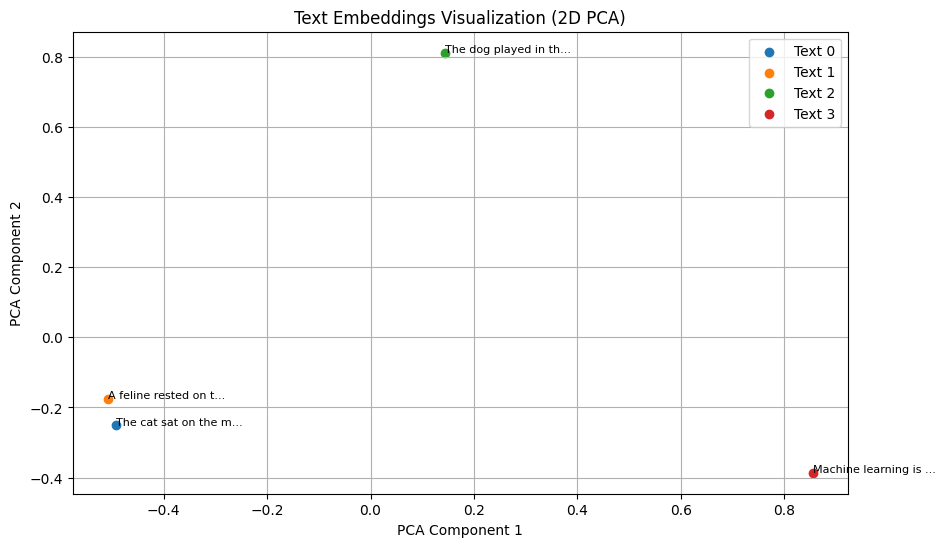

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize embeddings in 2D space using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i, text in enumerate(texts):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=f'Text {i}')
    plt.annotate(text[:20] + '...', (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Text Embeddings Visualization (2D PCA)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Calculate similarities
from sklearn.metrics.pairwise import cosine_similarity  # Import cosine similarity function
similarities = cosine_similarity(embeddings)  # Calculate pairwise similarities between all embeddings

In [36]:
print("\nSimilarity matrix:")  # Print header for similarity matrix
for i, text in enumerate(texts):  # Iterate through texts with indices        print(f"{i}: {text}")  # Print index and corresponding text
    print(f"{i}: {text}")  # Print index and corresponding text
print(similarities)  # Print the full similarity matrix


Similarity matrix:
0: The cat sat on the mat
1: A feline rested on the rug
2: The dog played in the park
3: Machine learning is fascinating
[[ 0.99999994  0.56433773  0.13988337 -0.03158435]
 [ 0.56433773  1.          0.17393288 -0.05231091]
 [ 0.13988337  0.17393288  0.99999994  0.02860965]
 [-0.03158435 -0.05231091  0.02860965  1.0000005 ]]


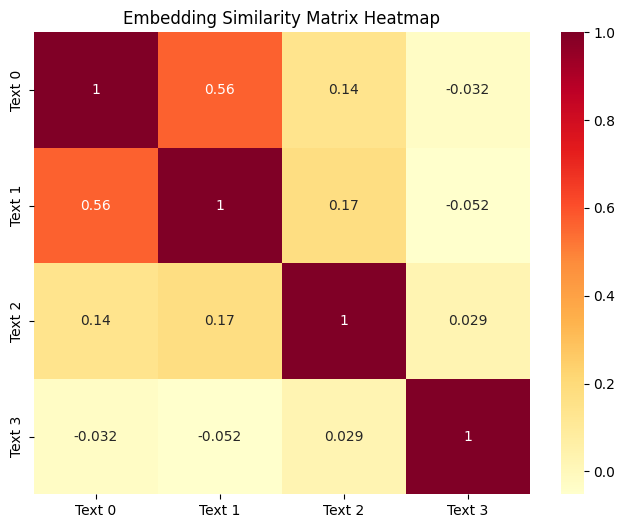

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize similarity matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarities, annot=True, cmap='YlOrRd', xticklabels=[f'Text {i}' for i in range(len(texts))], yticklabels=[f'Text {i}' for i in range(len(texts))])
plt.title('Embedding Similarity Matrix Heatmap')
plt.show()

Embedding models:
- Computer Vision: ResNet, VGG, Vision Transformer (ViT)
- NLP: Word2Vec, GloVe, BERT, Sentence Transformers
- Audio: Wav2Vec, HuBERT


Sentence Transformers are specifically designed for sentence-level embeddings
all-MiniLM-L6-v2 is a popular model for semantic similarity tasks


## vector_keyword_search.py
vector_keyword_search.py
Explanation of Vector Keyword Search
Vector keyword search uses techniques like TF-IDF and BM25 to rank documents based on keyword relevance.
TF-IDF: Term Frequency-Inverse Document Frequency - measures importance of terms in documents
BM25: Best Matching 25, an improved ranking function that considers term frequency and document length
Import required libraries for text processing and similarity calculations
TfidfVectorizer converts text documents to TF-IDF feature vectors


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
# cosine_similarity calculates similarity between vectors using cosine distance
from sklearn.metrics.pairwise import cosine_similarity
# numpy for numerical operations and array handling
import numpy as np


In [39]:
# Sample documents to demonstrate keyword-based search
# These documents contain overlapping keywords for testing relevance ranking
documents = [
    "The cat sat on the mat",        # Contains "cat"
    "The dog played in the park",    # Contains "dog"
    "Cats and dogs are pets",        # Contains both "cat" and "dog"
    "The weather is nice today"      # Contains neither keyword
]


In [40]:
# Create TF-IDF vectorizer to convert text to numerical vectors
# TF-IDF weighs terms by importance: high in specific doc, low across all docs
vectorizer = TfidfVectorizer()
# Fit the vectorizer to documents and transform them into TF-IDF matrix
# Each row is a document, each column is a term, values are TF-IDF scores
tfidf_matrix = vectorizer.fit_transform(documents)


In [41]:
# Define TF-IDF search function
def tfidf_search(query, documents, vectorizer, tfidf_matrix):
    """
    Perform TF-IDF based search.
    Converts query to TF-IDF vector and finds most similar documents.
    """
    # Transform the query into TF-IDF vector using the same vectorizer
    # This ensures query and documents use the same vocabulary/features
    query_vector = vectorizer.transform([query])

    # Calculate cosine similarity between query vector and all document vectors
    # cosine_similarity returns a matrix; flatten() converts to 1D array
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Sort indices in descending order (highest similarity first)
    # np.argsort gives indices in ascending order, [::-1] reverses it
    ranked_indices = np.argsort(similarities)[::-1]

    # Return list of (document, similarity_score) tuples in ranked order
    return [(documents[i], similarities[i]) for i in ranked_indices]

In [42]:
# BM25 implementation (simplified version for educational purposes)
class SimpleBM25:
    # Initialize BM25 model with documents and parameters
    def __init__(self, documents):
        # Store the original documents for scoring
        self.documents = documents

        # Dictionary to store document frequency for each term
        # Document frequency = number of documents containing the term
        self.doc_freq = {}

        # Calculate document lengths (number of words in each document)
        self.doc_lengths = [len(doc.split()) for doc in documents]

        # Calculate average document length across all documents
        self.avg_doc_length = np.mean(self.doc_lengths)

        # BM25 parameters: k1 controls term frequency scaling, b controls length normalization
        self.k1 = 1.5  # BM25 parameter for term frequency saturation
        self.b = 0.75  # BM25 parameter for document length normalization

        # Calculate document frequencies for all unique terms
        for doc in documents:
            # Convert to lowercase and split into words, use set to get unique terms
            words = set(doc.lower().split())
            # Count how many documents contain each term
            for word in words:
                self.doc_freq[word] = self.doc_freq.get(word, 0) + 1

    # Calculate BM25 scores for a query against all documents
    def score(self, query):
        # Split query into individual terms
        query_terms = query.lower().split()

        # List to store BM25 scores for each document
        scores = []

        # Calculate score for each document
        for doc_idx, doc in enumerate(self.documents):
            # Initialize score for this document
            score = 0

            # Get document length (number of words)
            doc_length = self.doc_lengths[doc_idx]

            # Convert document to lowercase words for term matching
            doc_words = doc.lower().split()

            # Calculate score contribution from each query term
            for term in query_terms:
                # Only score if the term appears in this document
                if term in doc_words:
                    # Term frequency: how many times term appears in this document
                    tf = doc_words.count(term)

                    # Document frequency: how many documents contain this term
                    df = self.doc_freq.get(term, 0)

                    # Inverse document frequency: rarer terms get higher weight
                    # Uses Laplace smoothing (+0.5) to avoid division by zero
                    idf = np.log((len(self.documents) - df + 0.5) / (df + 0.5))

                    # BM25 scoring formula: combines TF, IDF, and length normalization
                    # (tf * (k1 + 1)) / (tf + k1 * (1 - b + b * doc_length/avg_length))
                    score += idf * (tf * (self.k1 + 1)) / (tf + self.k1 * (1 - self.b + self.b * doc_length / self.avg_doc_length))

            # Add this document's score to the results list
            scores.append(score)

        # Return BM25 scores for all documents
        return scores

In [43]:
# Create BM25 model instance with our documents
bm25 = SimpleBM25(documents)


In [44]:
# Define BM25 search function
def bm25_search(query, bm25_model, documents):
    """
    Perform BM25 search.
    Uses BM25 scoring to rank documents by relevance to query terms.
    """
    # Get BM25 scores for all documents
    scores = bm25_model.score(query)

    # Sort document indices by BM25 score in descending order
    ranked_indices = np.argsort(scores)[::-1]

    # Return list of (document, score) tuples in ranked order
    return [(documents[i], scores[i]) for i in ranked_indices]

In [45]:
# Example usage demonstrating both TF-IDF and BM25 search
query = "cat dog"


In [46]:
# Perform TF-IDF search and display results
print("TF-IDF Search Results:")
tfidf_results = tfidf_search(query, documents, vectorizer, tfidf_matrix)
# Show top 3 results with formatted scores
for doc, score in tfidf_results[:3]:
    print(f"Score: {score:.3f} - {doc}")


TF-IDF Search Results:
Score: 0.298 - The dog played in the park
Score: 0.298 - The cat sat on the mat
Score: 0.000 - The weather is nice today


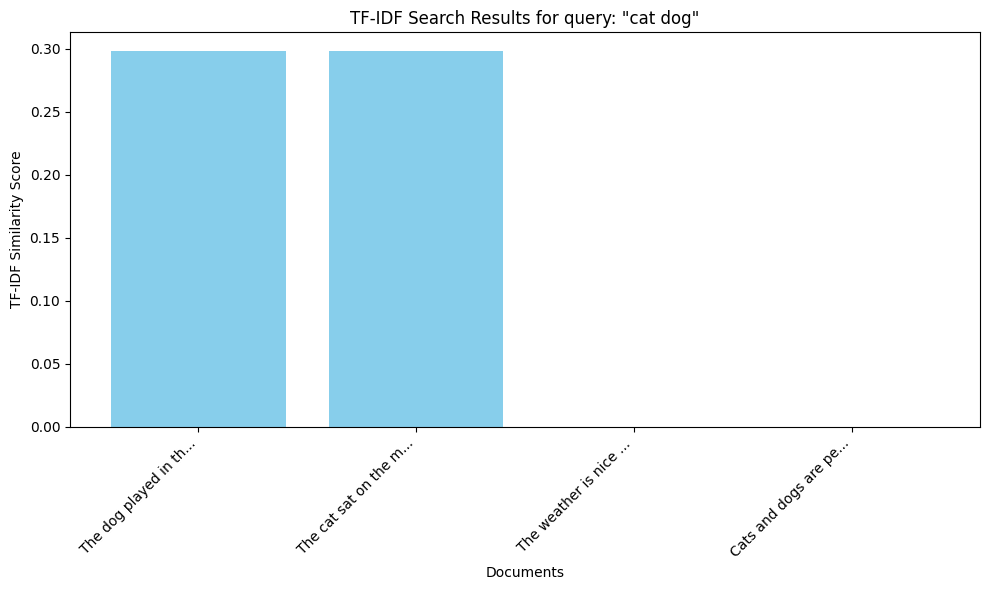

In [47]:
import matplotlib.pyplot as plt

# Visualize TF-IDF search results
docs, scores = zip(*tfidf_results)
plt.figure(figsize=(10, 6))
plt.bar(range(len(docs)), scores, color='skyblue')
plt.xticks(range(len(docs)), [doc[:20] + '...' for doc in docs], rotation=45, ha='right')
plt.xlabel('Documents')
plt.ylabel('TF-IDF Similarity Score')
plt.title(f'TF-IDF Search Results for query: "{query}"')
plt.tight_layout()
plt.show()

In [48]:
# Perform BM25 search and display results
print("\nBM25 Search Results:")
bm25_results = bm25_search(query, bm25, documents)
# Show top 3 results with formatted scores
for doc, score in bm25_results[:3]:
    print(f"Score: {score:.3f} - {doc}")



BM25 Search Results:
Score: 0.814 - The dog played in the park
Score: 0.814 - The cat sat on the mat
Score: 0.000 - The weather is nice today


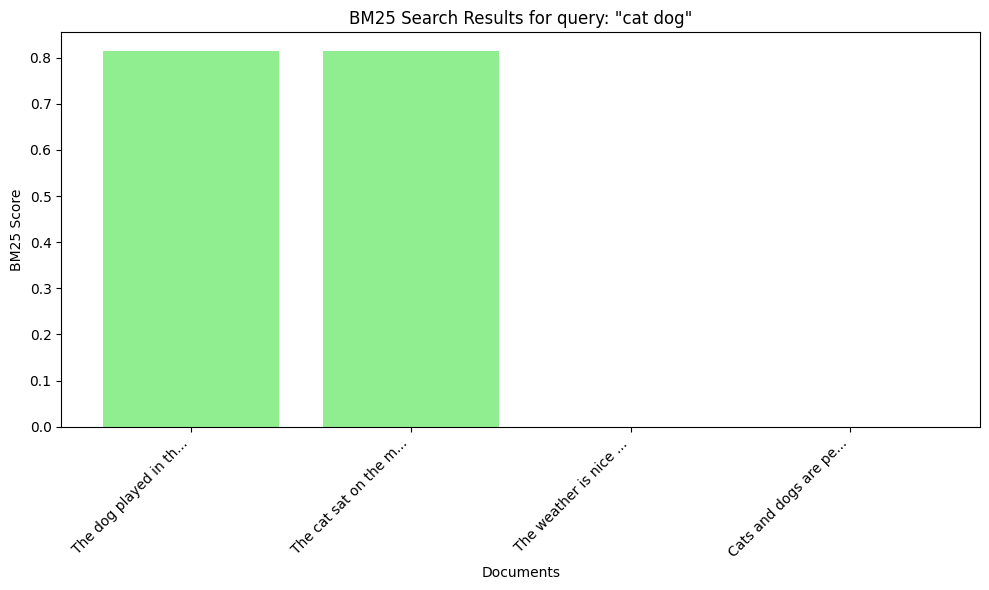

In [49]:
import matplotlib.pyplot as plt

# Visualize BM25 search results
docs, scores = zip(*bm25_results)
plt.figure(figsize=(10, 6))
plt.bar(range(len(docs)), scores, color='lightgreen')
plt.xticks(range(len(docs)), [doc[:20] + '...' for doc in docs], rotation=45, ha='right')
plt.xlabel('Documents')
plt.ylabel('BM25 Score')
plt.title(f'BM25 Search Results for query: "{query}"')
plt.tight_layout()
plt.show()

## semantic_search.py
semantic_search.py
Explanation of Semantic Search
Semantic search goes beyond keyword matching to understand the meaning of words and context.
It uses embeddings to represent text semantically, allowing for more accurate retrieval.
Simple example using sentence transformers for semantic similarity
Try to import required libraries for semantic search functionality


In [50]:
try:
    # Import SentenceTransformer for generating text embeddings
    from sentence_transformers import SentenceTransformer
    # Import cosine_similarity for measuring similarity between embeddings
    from sklearn.metrics.pairwise import cosine_similarity
    # Import numpy for numerical operations and array handling
    import numpy as np

except ImportError:
    # Print helpful error message with installation instructions
    print("sentence-transformers not installed. Install with: pip install sentence-transformers")

# Additional explanation of semantic search concepts
print("Semantic search uses embeddings to understand meaning rather than exact keywords.")
print("Example: Query 'feline resting' would match 'cat sleeping' due to semantic similarity.")

Semantic search uses embeddings to understand meaning rather than exact keywords.
Example: Query 'feline resting' would match 'cat sleeping' due to semantic similarity.


In [51]:
# Load a pre-trained sentence transformer model for embedding generation
# 'all-MiniLM-L6-v2' is a lightweight model that converts text to 384-dimensional vectors
model = SentenceTransformer('all-MiniLM-L6-v2')

In [52]:
# Define the main semantic search function
def semantic_search(query, documents, model, top_k=3):
        """
        Perform semantic search using embeddings.
        This function converts both query and documents to embeddings,
        then finds the most semantically similar documents to the query.
        """
        # Encode the query text into a single embedding vector
        # model.encode([query]) returns a list, so we take the first (and only) element [0]
        query_embedding = model.encode([query])[0]

        # Encode all documents into embedding vectors
        # This creates a matrix where each row is a document's embedding
        doc_embeddings = model.encode(documents)

        # Calculate cosine similarity between query embedding and all document embeddings
        # cosine_similarity returns a matrix, so we take the first row [0] for our single query
        similarities = cosine_similarity([query_embedding], doc_embeddings)[0]

        # Get the indices of the top-k most similar documents
        # np.argsort sorts in ascending order, [::-1] reverses to descending, [:top_k] takes top k
        top_indices = np.argsort(similarities)[::-1][:top_k]

        # Create results list with document text and similarity scores
        # Pair each top document with its similarity score
        results = [(documents[i], similarities[i]) for i in top_indices]

        # Return the top-k most semantically similar documents with their scores
        return results

In [53]:
# Example documents to demonstrate semantic search
# These documents contain both relevant and irrelevant content
documents = [
        "The cat is sleeping on the couch",        # Directly related to query
        "A feline rests on furniture",            # Semantically similar (feline = cat)
        "Dogs love to play fetch",                # Related to pets but different animal
        "The weather is beautiful today",         # Unrelated topic
        "Pets need regular veterinary care"       # Related to pets in general
]

In [54]:
# Example query that should match semantically similar documents
query = "My cat is resting"

In [55]:
# Perform semantic search and get top 3 results
results = semantic_search(query, documents, model)

In [56]:
# Display the search results
print(f"Semantic search results for '{query}':")
# Print each result with its similarity score formatted to 3 decimal places
for doc, score in results:
        print(f"Score: {score:.3f} - {doc}")


Semantic search results for 'My cat is resting':
Score: 0.647 - A feline rests on furniture
Score: 0.479 - The cat is sleeping on the couch
Score: 0.407 - Pets need regular veterinary care


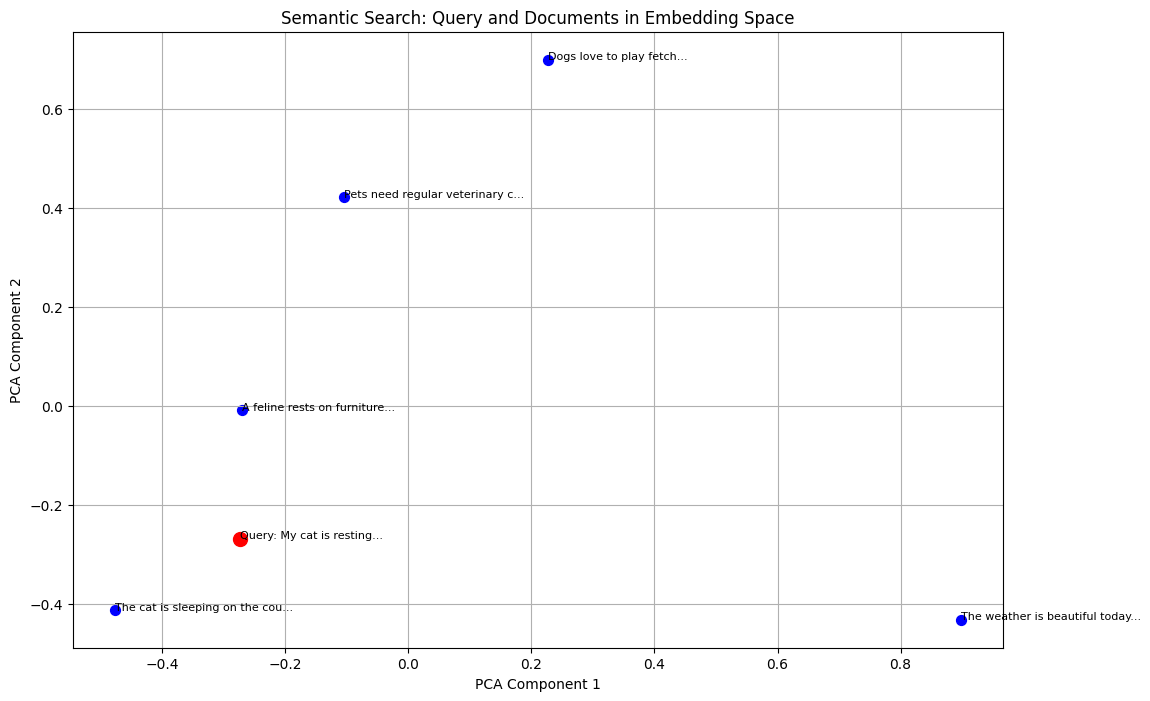

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize semantic search results
query_embedding = model.encode([query])[0]
doc_embeddings = model.encode(documents)

# Add query to the embeddings for visualization
all_embeddings = np.vstack([query_embedding, doc_embeddings])
all_texts = [f'Query: {query}'] + documents

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings)

plt.figure(figsize=(12, 8))
colors = ['red'] + ['blue'] * len(documents)  # Red for query, blue for docs
for i, text in enumerate(all_texts):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[i], s=100 if i==0 else 50)
    plt.annotate(text[:30] + '...', (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Semantic Search: Query and Documents in Embedding Space')
plt.grid(True)
plt.show()